In [1]:
import pandas as pd

In [3]:
df=pd.read_csv("E:\\notebooks file\\newspaperData.csv")

In [4]:
df

,Newspaper,daily,sunday
0,Baltimore Sun,391.952,488.506
1,Boston Globe,516.981,798.298
2,Boston Herald,355.628,235.084
3,Charlotte Observer,238.555,299.451
4,Chicago Sun Times,537.780,559.093
5,Chicago Tribune,733.775,1133.249
6,Cincinnati Enquirer,198.832,348.744
7,Denver Post,252.624,417.779
8,Des Moines Register,206.204,344.522
9,Hartford Courant,231.177,323.084


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Newspaper  34 non-null     object 
 1   daily      34 non-null     float64
 2   sunday     34 non-null     float64
dtypes: float64(2), object(1)
memory usage: 948.0+ bytes


In [10]:
df1=df.iloc[:,1:]

In [11]:
df1.corr()

,daily,sunday
daily,1.000000,0.958154
sunday,0.958154,1.000000


C:\Users\Server\AppData\Local\Temp\ipykernel_1500\2485077132.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.daily)


<Axes: xlabel='daily', ylabel='Density'>

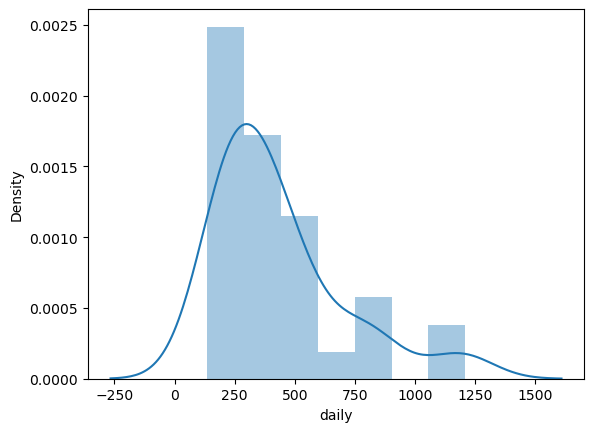

In [12]:
import seaborn as sns
sns.distplot(df.daily)

C:\Users\Server\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


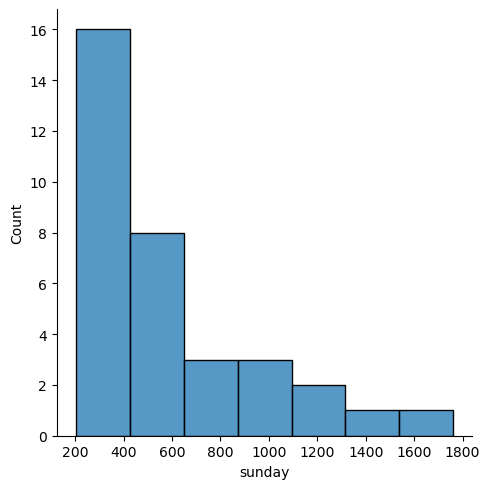

In [13]:
sns.displot(df.sunday)

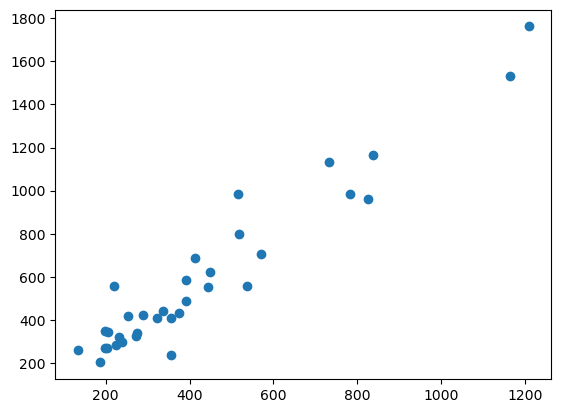

In [16]:
import matplotlib.pyplot as plt
plt.scatter(df.daily,df.sunday)

In [17]:
import statsmodels.formula.api as smf
model=smf.ols("sunday~daily",data=df).fit()

<Axes: xlabel='daily', ylabel='sunday'>

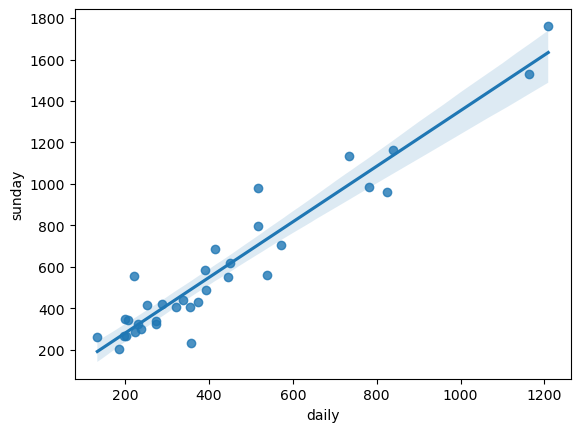

In [19]:
sns.regplot(x='daily',y='sunday',data=df)

In [20]:
model.params

Intercept    13.835630
daily         1.339715
dtype: float64

In [21]:
print(model.tvalues,'/n',model.pvalues)

Intercept     0.386427
daily        18.934840
dtype: float64 /n Intercept    7.017382e-01
daily        6.016802e-19
dtype: float64


In [22]:
model.rsquared,model.rsquared_adj

(0.9180596895873295, 0.9154990548869336)

In [24]:
newdata=pd.Series([200,300])

In [25]:
df_pred=pd.DataFrame(newdata,columns=['daily'])

In [27]:
model.predict(df_pred)

0    281.778581
1    415.750057
dtype: float64

In [28]:
newdata1=pd.Series([391.952,516.981])

In [29]:
df_pred=pd.DataFrame(newdata1,columns=['daily'])

In [32]:
df_pred

,daily
0,391.952
1,516.981


In [30]:
model.predict(df_pred)

0    538.939509
1    706.442705
dtype: float64